# BLG 527E - Machine Learning
## Term Project

In [1]:
#import neccessary libraries
import warnings
import os
warnings.filterwarnings('ignore')

#libraries for data analysis
import pandas as pd
import numpy as np
import math
from scipy import stats
from scipy.stats import norm

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#show all row and column values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data Description
### Citation Knowledge with Position Dataset

This dataset contains information from scientific publications written by authors who have published papers in the RecSys conference. It contains four files which have information extracted from scientific publications. The details of each file are explained below:

i) all_authors.tsv: This file contains the details of authors who published research papers in the RecSys conference. The details include authors' identifier in various forms, such as number, orcid id, dblp url, dblp key and google scholar url, authors' first name, last name and their affiliation (where they work)

ii) all_publications.tsv: This file contains the details of publications authored by the authors mentioned in the all_authors.tsv file (Please note the list of publications does not contain all the authored publications of the authors, refer to the publication for further details).

The details include publications' identifier in different forms (such as number, dblp key, dblp url, dblp key, google scholar url), title, filtered title, published date, published conference and paper abstract.

iii) selected_author_publications_information.tsv: This file consists of identifiers of authors and their publications. Here, we provide the information of selected authors and their publications used for our experiment.

iv) selected_publication_citations_information.tsv: This file contains the information of the selected publications which consists of both citing and cited papers’ information used in our experiment. It consists of identifier of citing paper, identifier of cited paper, citation title, citation filtered title, the sentence before the citation is mentioned, citing sentence, the sentence after the citation is mentioned, citation position (section).

Please note, it does not contain information of all the citations cited in the publications. For more detail, please refer to the paper.

This dataset is for the use of research purposes only and if you use this dataset, please cite our paper "Capturing and exploiting citation knowledge for recommending recently published papers".

https://ieeexplore.ieee.org/abstract/document/9338486

In [2]:
#read data from .tsv files
df_all_authors = pd.read_csv("all_authors.tsv", sep='\t', encoding= 'ISO-8859-1')
df_all_publications = pd.read_csv("all_publications.tsv", sep='\t')
df_selected_author_publications = pd.read_csv("selected_author_publications_information.tsv", sep='\t')
df_selected_publication_citations = pd.read_csv("selected_publication_citations_information.tsv", sep='\t')

## Clustering of Papers by subject

In this section, you are expected to find a clustering model that will place papers on similar topics in the same cluster using the contents of the papers.You may use the paper abstracts in the dataset for this. You can also obtain additional information about any paper from the shared url's. How you create the dataset is up to you. Note that you need to select features that will aid clustering by topics.

An example clustering study with SBERT: https://www.sbert.net/examples/applications/clustering/README.html


Things to do:

* Create the dataset to be used in clustering by making use of the shared datasets in this folder.

* Split the dataset as training data & test data (general approach is to separate it as 70% - 30%). **In all clustering methods same training - test datasets must be used.**

* 4 clustering methods are given in the following cells. You need to make the necessary coding right after the cell reserved for the method. You need to train the prediction model on the training data and share the prediction results you obtained on the test data with the visualizations.
 
  Clustering Methods: https://scikit-learn.org/stable/modules/clustering.html


* For each clustering method, you are expected to compare the performance of 3 different text-to-vec pre-trained models. For this, you must choose 2 of the clustering performance evaluation metrics.

  Pre-trained text-to-vec models: [https://www.sbert.net/docs/pretrained_models.html](https://www.sbert.net/docs/pretrained_models.html)

  Clustering Performance Evaluation Metrics: [https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

* To optimize the each clustering method, try at least 3 different values for a hyperparameter of this method.


# Dataset Creation


**Hint:** 

*   With 3 different pre-trained text-to-vec models, 3 different datasets are created.

* Do not repeatedly create these three datasets under each clustering model. Do this at once and save it to a file. In the code cell allocated for each clustering model, first read the data you saved from the file, then complete the other necessary operations.

* Consider also the runtime of pre-trained text-to-vec models and Google Colab resource constraints. With the file you created, it may not be possible to get results from the pre-trained model at once. In this case, divide the dataset into subsets, present them as separate inputs to the pre-trained text-to-vec model and combine the results.

* You may complete the data creation phase with pre-trained text-to-vec models on your own computer or on a different additional hardware source. However, you need to share the created datasets via Google Drive and write the code you have executed in the relevant cell below.


In [3]:
import pickle
with open("my-embeddings-content.pkl", "rb") as fIn:
    cache_data = pickle.load(fIn)
    corpus_sentences = cache_data['sentences']
    corpus_embeddings = cache_data['embeddings']

with open("my-embeddings-all-MiniLM-L12-v2.pkl", "rb") as fIn:
    cache_data = pickle.load(fIn)
    corpus_embeddings_miniLM_L12 = cache_data['embeddings']

with open("my-embeddings-universal.pkl", "rb") as fIn:
    cache_data = pickle.load(fIn)
    corpus_embeddings_universal = cache_data['embeddings']

https://stackoverflow.com/questions/68334844/how-to-save-sentence-bert-output-vectors-to-a-file

##Clustering
### K-means
 
 Compare 3 different pre-trained text-to-vec models.

 Use 2 performance evaluation metrics and virtualize the results.

 To optimize the method, try at least 3 different values for a hyperparameter of this method.

In [ ]:
#Code Below

### Spectral Clustering
 
 Compare 3 different pre-trained text-to-vec models.

 Use 2 performance evaluation metrics and virtualize the results.

 To optimize the method, try at least 3 different values for a hyperparameter of this method.

In [ ]:
#Code Below
#You can add as many code cells as you want.

### DBSCAN
 
 Compare 3 different pre-trained text-to-vec models.

 Use 2 performance evaluation metrics and virtualize the results.

 To optimize the method, try at least 3 different values for a hyperparameter of this method.

In [4]:
#Code Below
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [5]:
#with pca
pca = PCA(n_components=2)
corpus_embeddings_universal_pca = pca.fit_transform(corpus_embeddings_universal)
corpus_embeddings_miniLM_L6_pca = pca.fit_transform(corpus_embeddings)
corpus_embeddings_miniLM_L12_pca = pca.fit_transform(corpus_embeddings_miniLM_L12)

In [6]:
def plotMetrics(calinski_harabasz_scr,silhouette_scr,davies_bouldin_scr, k_min, k_max):
    plt.figure(figsize=(15, 5))
    plt.plot(range(k_min, k_max), calinski_harabasz_scr)
    plt.xlabel("# of Clusters") 
    plt.ylabel("Calinski Harabasz score") 
    plt.title("Calinski Harabasz score analysis For Optimal k")
    plt.show()
    
    plt.figure(figsize=(15, 5))
    plt.plot(range(k_min, k_max),silhouette_scr)
    plt.xlabel("# of Clusters") 
    plt.ylabel("Silhouette score") 
    plt.title("Silhouette analysis For Optimal k")
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.plot(range(k_min, k_max),davies_bouldin_scr)
    plt.xlabel("# of Clusters") 
    plt.ylabel("Davies Bouldin score") 
    plt.title("Davies Bouldin analysis For Optimal k")
    plt.show()

In [10]:
from sklearn.neighbors import NearestNeighbors

def find_epsilon(data):
    
    # Compute the distance matrix
    distances = NearestNeighbors(n_neighbors=50).fit(data).kneighbors()[0]

    # Sort the distances
    distances = np.sort(distances, axis=0)

    # Compute the k-distance
    k = 50
    k_distances = distances[:, k-1]

    # Sort the k-distances
    k_distances_sorted = np.sort(k_distances, axis=0)

    # Plot the k-distance
    fig, ax = plt.subplots()
    plt.figure(figsize=(9, 6))
    ax.plot(k_distances_sorted)
    ax.set_xlabel('Point index')
    ax.set_ylabel(f'{k}-distance')
    plt.show()

In [8]:
from sklearn.cluster import DBSCAN
def plotDBSCANMetrics(data,eps,minPts=50):
    dbscan_clustering = DBSCAN(eps=eps,min_samples=minPts).fit(data)
    cluster_labels = dbscan_clustering.labels_
    
    print("Silhoutte score(minPts={} ,eps={}): {}".format(minPts,eps,silhouette_score(data, cluster_labels)))
    print("Davies Bouldin score(minPts={} ,eps={}): {}".format(minPts,eps,davies_bouldin_score(data, cluster_labels)))
    print("Calinski Harabasz score(minPts={} ,eps={}): {}".format(minPts,eps,calinski_harabasz_score(data,cluster_labels)))
    print("-----------------------------------------------------------------------")

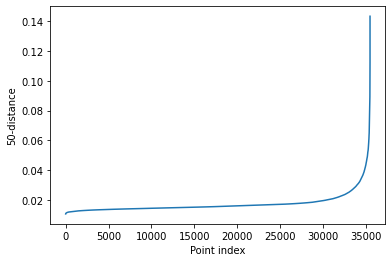

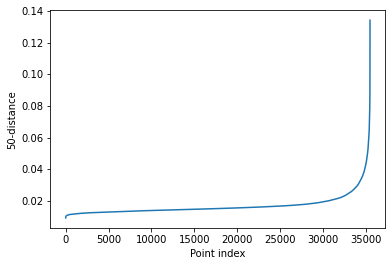

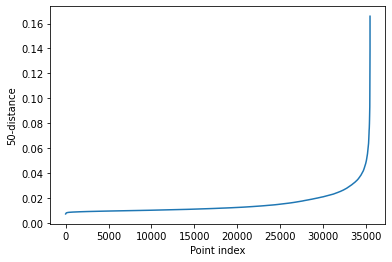

In [9]:
find_epsilon(corpus_embeddings_miniLM_L6_pca)
find_epsilon(corpus_embeddings_miniLM_L12_pca)
find_epsilon(corpus_embeddings_universal_pca)


### Gaussian Mixture
 
 Compare 3 different pre-trained text-to-vec models.

 Use 2 performance evaluation metrics and virtualize the results.

 To optimize the method, try at least 3 different values for a hyperparameter of this method.

In [ ]:
#Code Below
#You can add as many code cells as you want.

### The most accurate clustering model you recommend

Present the operations for the selected clustering method and the text-to-vec pre-trained models pair again below.

In [ ]:
#Code Below
#You can add as many code cells as you want.

## Clustering Analysis

**Only for the most accurate clustering model you recommend**,

1.   How many clusters did the model you propose create?
2.   What is the number of papers in each cluster?
3.   What is the unique number of authors in each cluster?
4.   What are the top 3 most frequently used words (the words that describe the cluster) in each cluster?
        
        Ex: https://www.sbert.net/examples/applications/clustering/README.html


In [ ]:
#Code Below
#You can add as many code cells as you want.

## Clustering of Authors

Observe the method you recommended in a different area. Cluster authors by research area.
How you create the dataset is up to you. Note that you need to select features that will aid clustering by research area.

In [ ]:
#Code Below
#You can add as many code cells as you want.

#Students who want to get extra points can also do additional work on the following research areas. This part is not mandatory.

## Semantic Search
 Selecting and presenting the papers closest to the entered text.


*   https://www.sbert.net/examples/applications/semantic-search/README.html
*   https://huggingface.co/course/chapter5/6?fw=pt





In [ ]:
#This part is not mandatory
#Code Below
#You can add as many code cells as you want.

## Academic Ranking of Authors


In [ ]:
#This part is not mandatory
#Code Below
#You can add as many code cells as you want.